In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('F:\DATA SCIENCE\Projects\Adult Census project\\notebooks\Data\\adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Basic information about the features::

1. age : feature represents the age of the people.

2. workclass : There are 9 different working classes in the dataset r.

3. fnlwgt : Final weight feature is a continuous variable that's used to estimate the population of people 16 and older in each state. It also controls for Hispanic origin by age and sex.

4. education : gives information about the educational qualifications of the people.
5. education-num : numeric representation of the education level.
6. marital-status : marriage status of the people can be simply understood under two classes married or unmarried

7. occupation : The feild of work of different people.
8. relationship : What relationship status they have in their family.
9. race : which race or group the individual belong to
10. sex : Male or Female
11. capital-gain : the increase in the value of a capital asset when it is sold. 
12. capital-loss : the loss incurred when the value decreases for a capital asset, such as an investment or real estate.

13. hours-per-week : Number of working hours of the individual.

14. country : The country of origin of the different people.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
print(df[df['salary']==' <=50K']['salary'].value_counts())
print(df[df['salary']==' >50K']['salary'].value_counts())


salary
 <=50K    24720
Name: count, dtype: int64
salary
 >50K    7841
Name: count, dtype: int64


## Exploratory Data Analysis


In [5]:
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']

In [6]:
print('Categorical columns in our dataset are: ',categorical_columns)
print('\nnumerical columns in our dataset are: ',numerical_columns)

Categorical columns in our dataset are:  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'country', 'salary'],
      dtype='object')

numerical columns in our dataset are:  Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


<Axes: >

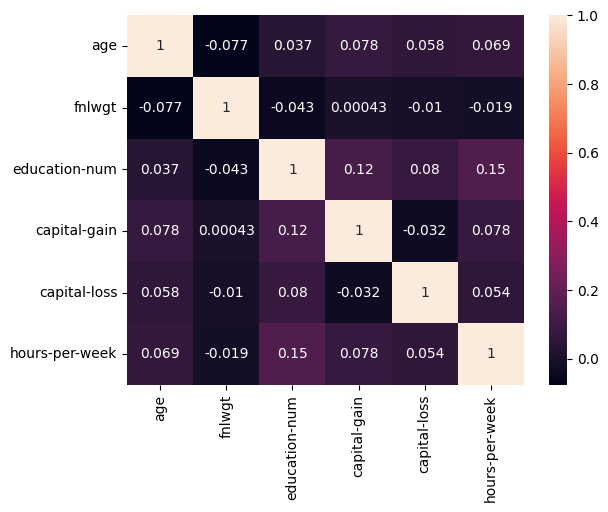

In [7]:
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [8]:
print('various workclasses present in the dataset: ',df['workclass'].unique())
print('\n Number of workclasses: ',df['workclass'].nunique())

various workclasses present in the dataset:  [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

 Number of workclasses:  9


In [9]:
print('different eduactional qualifications in the dataset : ',df['education'].unique())

different eduactional qualifications in the dataset :  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


In [10]:
df['education'].value_counts()

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

We can club the datapoints of pre-school to class 12th into one category like- 'Others' for reducing the number of unique features and also because each of them have less datapoints related to them

In [11]:
def replace_val(education):
    Other_categ=[' 11th',' 9th', ' 7th-8th',' 5th-6th',' 10th', ' 1st-4th', ' Preschool',' 12th']
    if education in Other_categ:
        return 'Other'
    else:
        return education

df['education']=df['education'].apply(replace_val)
print(df['education'].unique())

[' Bachelors' ' HS-grad' 'Other' ' Masters' ' Some-college' ' Assoc-acdm'
 ' Assoc-voc' ' Doctorate' ' Prof-school']


In [12]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [13]:
df['marital-status'].value_counts()

marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

In [14]:
def mar_status(status):
    unmarried=[' Never-married',' Divorced',' Separated',
       ' Widowed']
    if status in unmarried:
        return 'unmarried'
    else :
        return 'married'
    
df['marital-status']=df['marital-status'].apply(mar_status)
print(df['marital-status'].unique())

['unmarried' 'married']


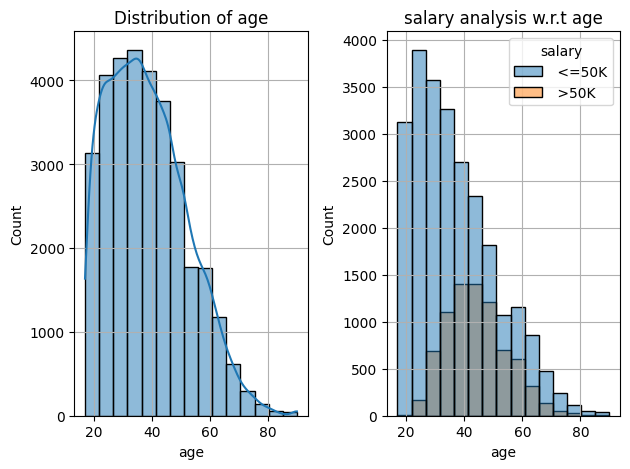

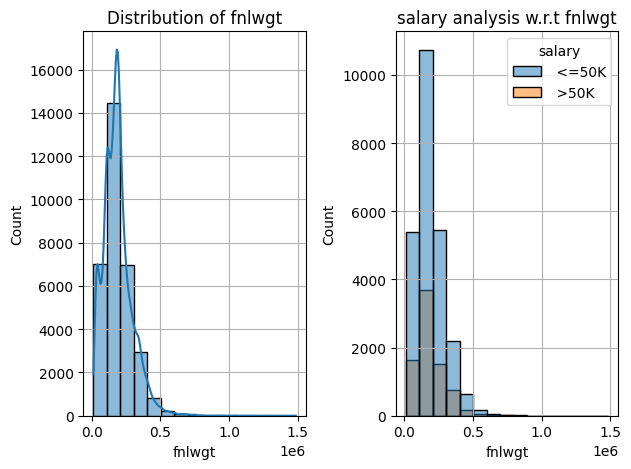

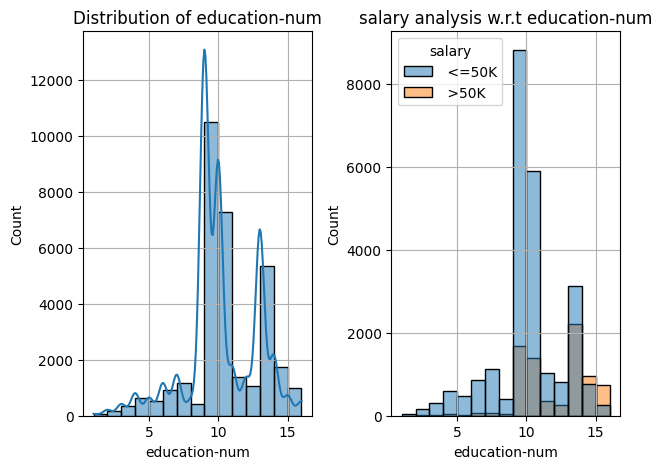

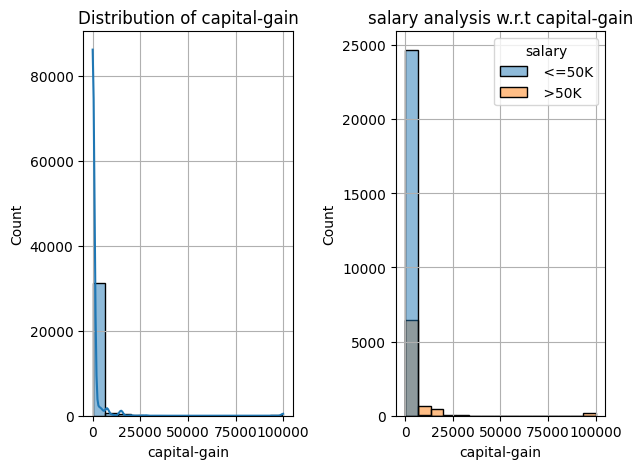

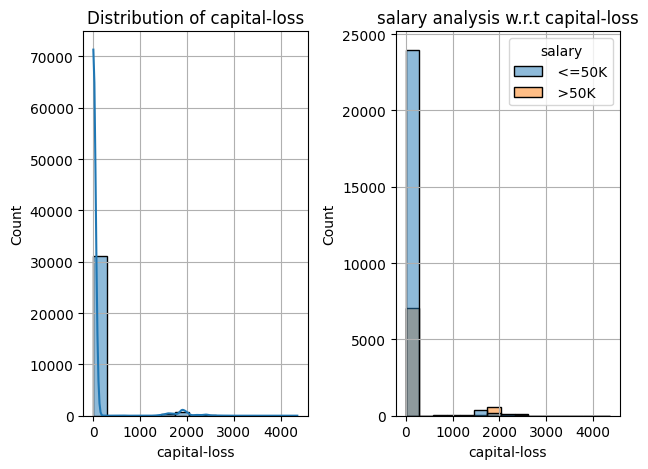

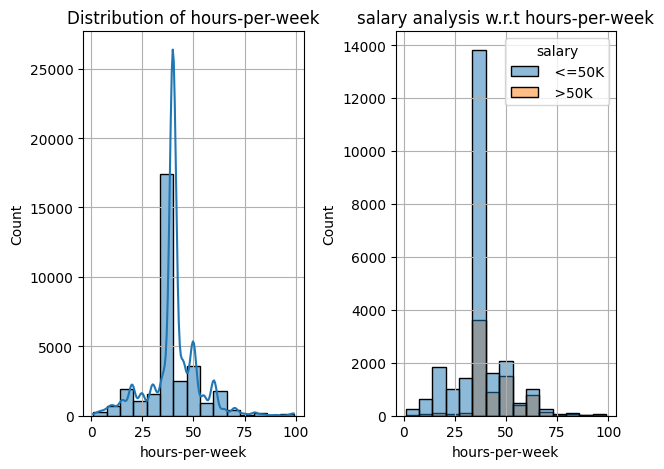

In [15]:
for feature in numerical_columns:

    plt.subplot(1,2,1)
    sns.histplot(x=df[feature],kde=True,bins=15)
    plt.tight_layout()
    plt.title('Distribution of {}'.format(feature))
    plt.grid(True)
    plt.subplot(1,2,2)
    sns.histplot(x=df[feature],hue=df['salary'],bins=15)
    plt.tight_layout()
    plt.title('salary analysis w.r.t {}'.format(feature))
    plt.grid(True)
        
    plt.show()

## Insights for numerical features 

#### Feature age::
Observing the age feature we can see that there are no records present for people with age less than 20 years and grater than 90 years. The maximum frequency of data present is between the ages 30 and 40. The distribution is right skewed and is more skewed for earnings >50K therefore greater age groups have a greater chance of earnning more than 50K

Observing the data for salary we can see that maximum records for salary greater than 50K is centered around the age group of around 40 and 50. Also there are no records of salary greater than 50K in the age group less tahn 20 and greater than 80

#### Feature 'hours-per-week'::
Here we can observe that the distribution is centred about 40 hrs of work , maximum datapoints for hrs=40. 

#### Feature 'capital-loss' ::
The data is quite unsymmetric in nature.

#### Feature 'capital-gain' ::
The distribution of capital-gain is skewed and have outliers present.

#### Feature 'fnlwgt'::
No perticular trend observed in the feature.

#### Feature 'education-num'
Tells us the number of years of education and it can be seen from the plot that high income groups have more years of education.

<Axes: xlabel='salary', ylabel='education-num'>

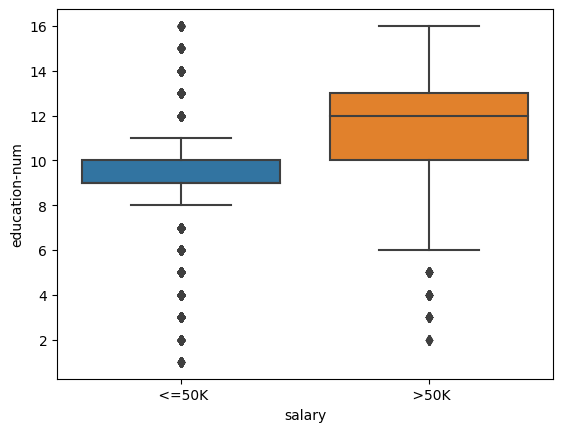

In [16]:
sns.boxplot(data=df,x='salary',y='education-num')

## Plots for the categorical columns

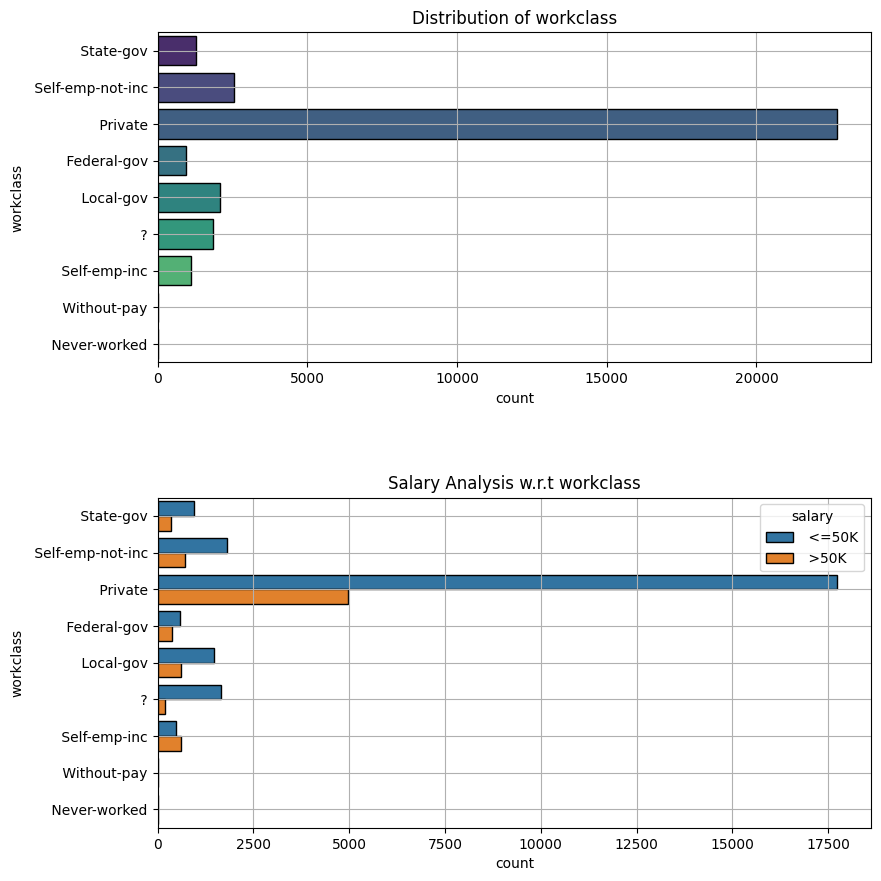

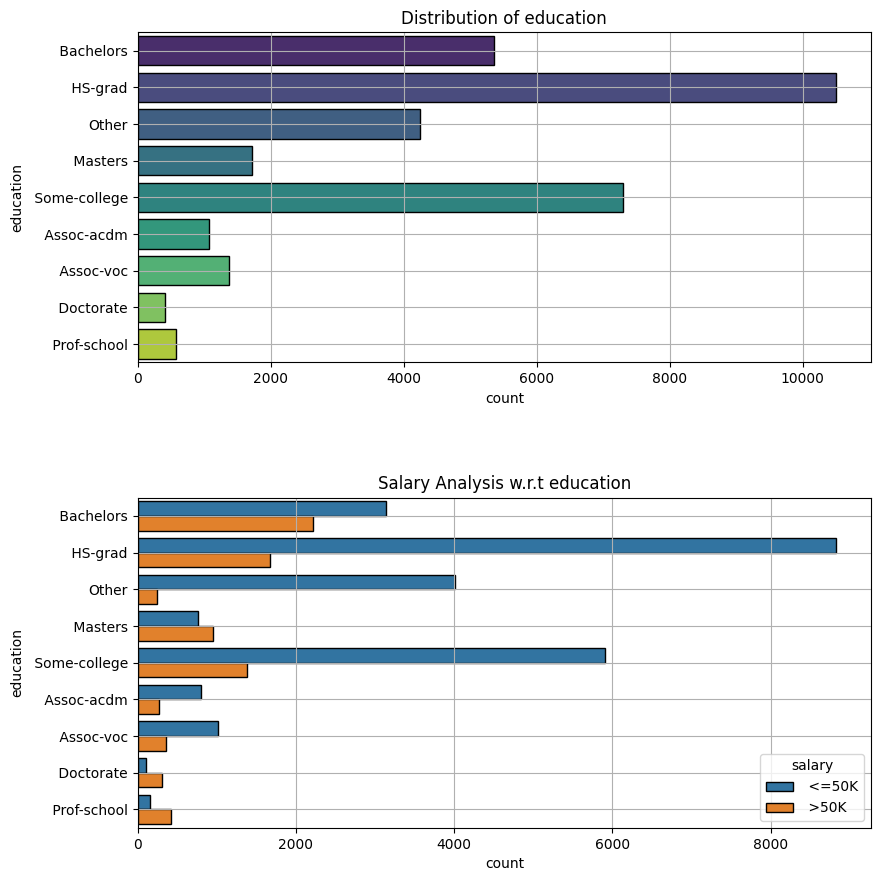

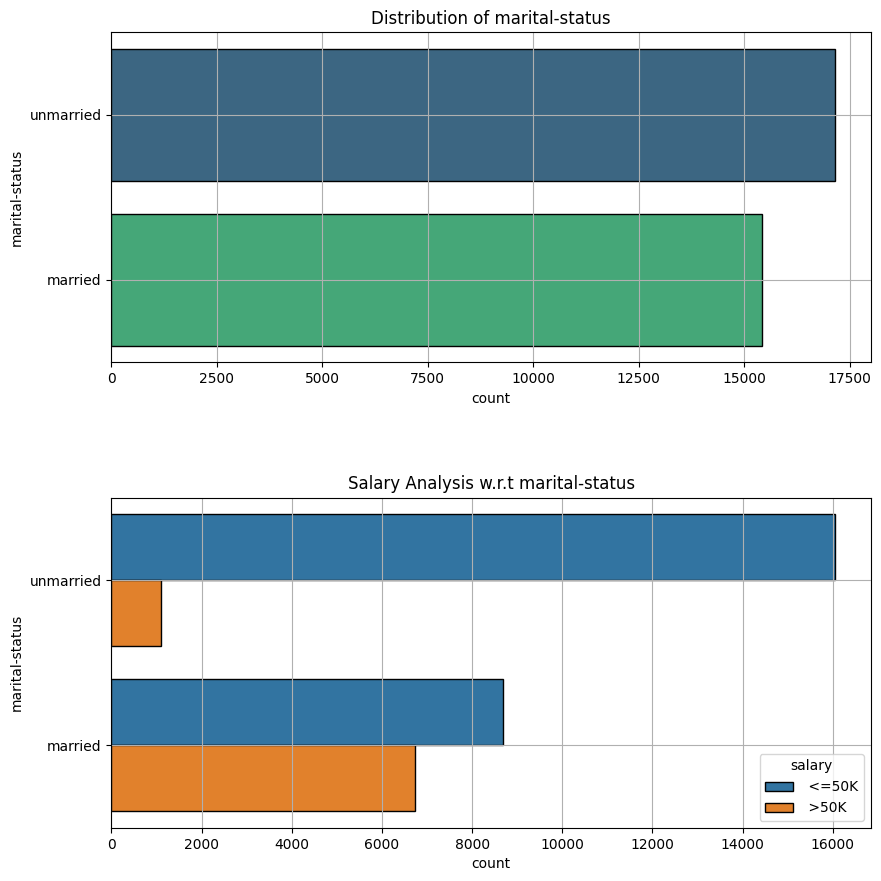

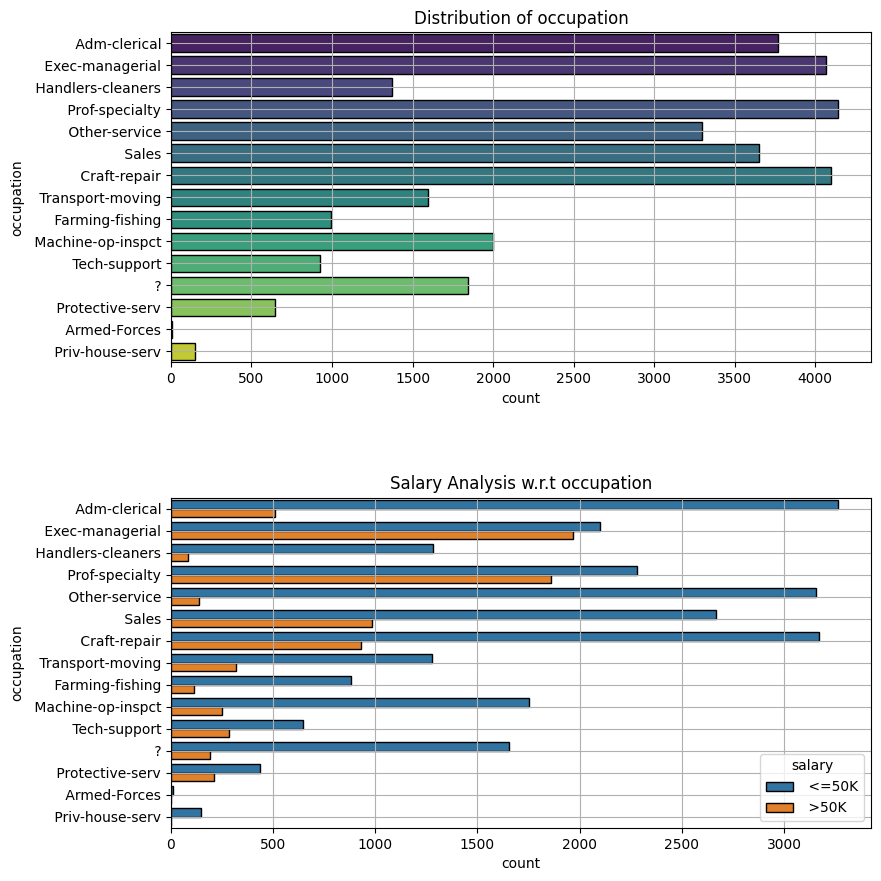

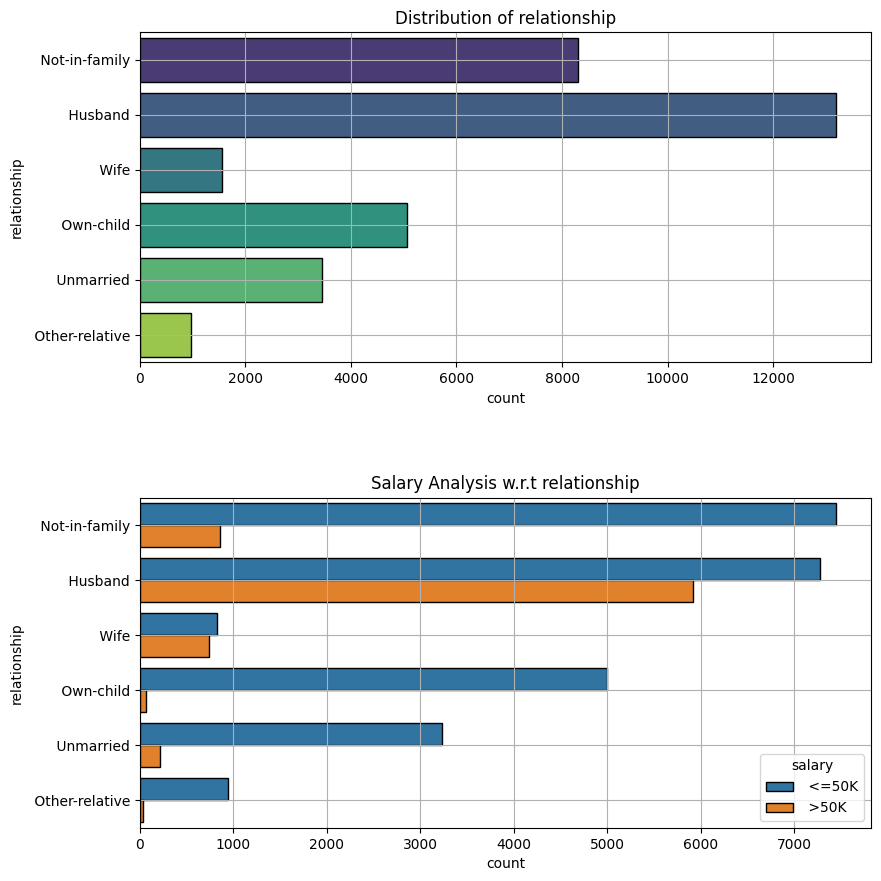

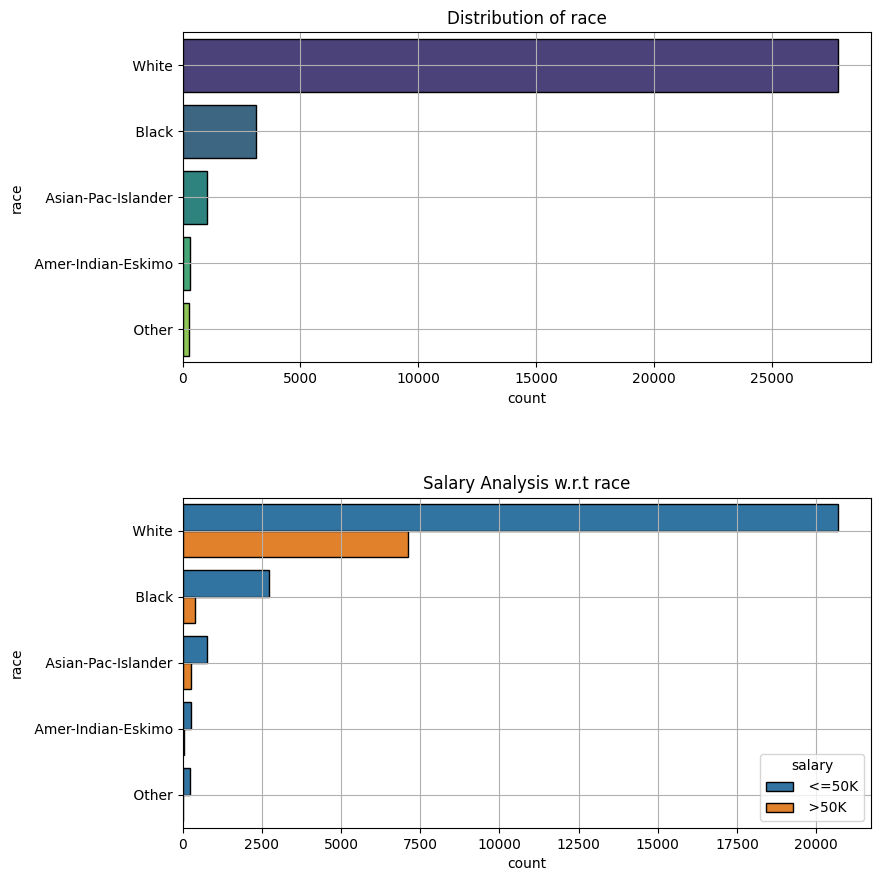

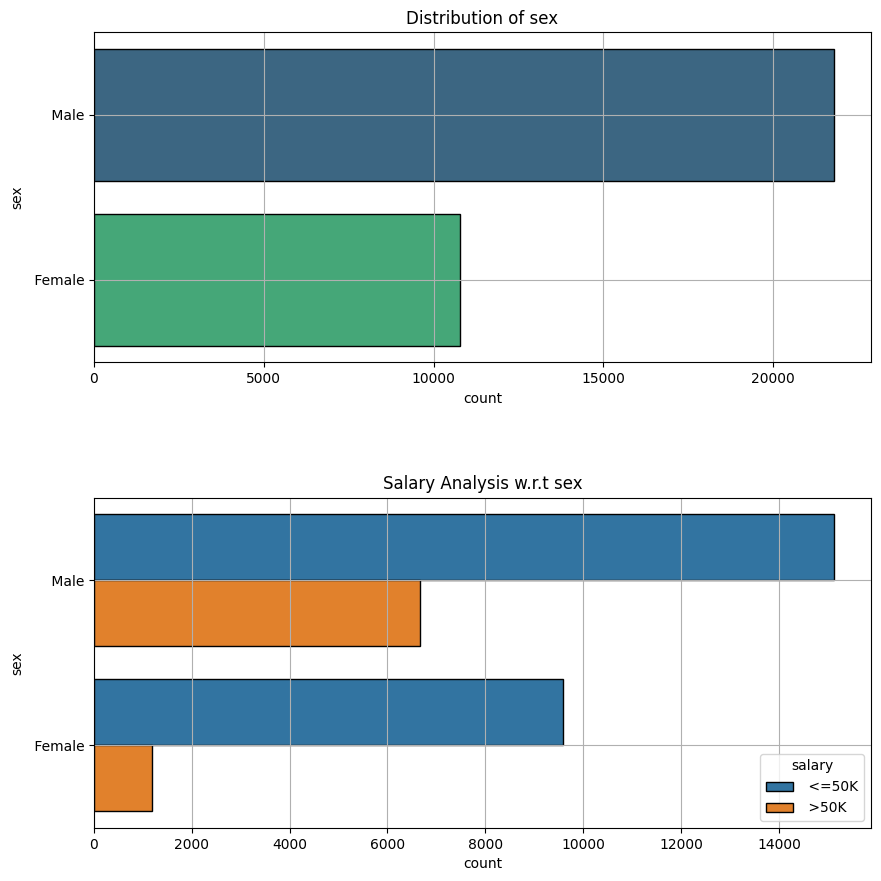

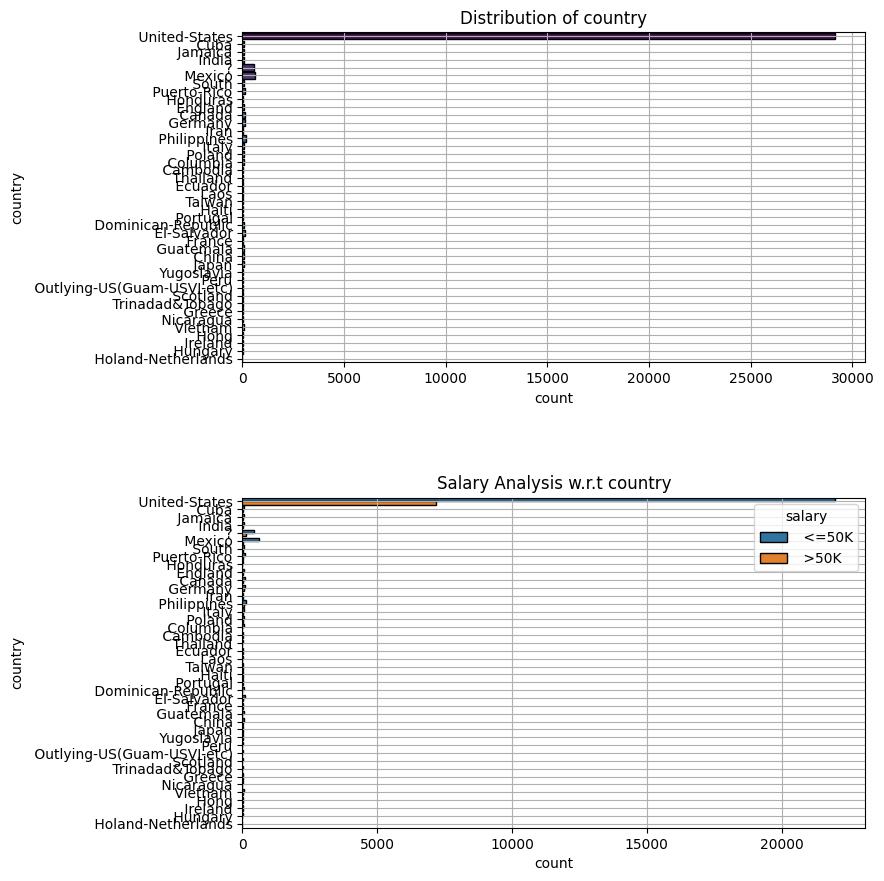

<Figure size 1000x1000 with 0 Axes>

In [17]:
for feature in categorical_columns:
    plt.figure(figsize=(10,10))
    
    if feature !='salary':

        plt.subplot(2,1,1)
        sns.countplot(data=df,y=feature,palette='viridis',edgecolor='black')
        plt.title('Distribution of {}'.format(feature))
        plt.grid(True)

        plt.subplot(2,1,2)
        sns.countplot(data=df,y=feature,hue='salary',edgecolor='black')
        plt.title('Salary Analysis w.r.t {}'.format(feature))
        plt.grid(True)
        plt.tight_layout(pad=5.0)
        plt.show()

## Insights for categorical columns


#### Feature 'Workclass'::
There is a category '?' which has to be handled 
Maximum amount of people work in the private sector and has maximum number of people with salaries more than 50K in this working-classs category.

#### Feature  Education::
Most of the people have High school education very few have a Doctorate or Prof-school. Higher educational qualification corresponds to higher salaries therefore there is higher frequency of people earning more than 50K in the categories of Doctorate, Prof-school and Masters.

#### Feature marital-status ::
From the above graph we can observe that married category has a higher proportion of population earning more than 50K 


#### Feature 'occupation' ::
from the above graph we can observe that people working in Prof-Speciality, Exec-managerial have the highest proportion of people earning more than 50k and farming-fishing, handlers-cleaners have the lowest proportion of people earning more than 50K , excuding the data of the armed forces and Priv-house-serv

There is also an occupation labelled as '?' which has to be handled.


#### Feature 'Relationship' ::
Majority of people earning more than 50K fall under the husband category of the relationship


#### Feature 'race' ::
According to the data provided the percentage or proportion of people earning more than 50K is high for white people and Asian-Pac-Islanders.
But there is disproportionate data present here. The number of entries for White people is 27816 with the second most prevalent race being the blacks with only 3124 entries.


#### Feature 'sex' ::
From the graph we can see that there is a higher proportion of males earning more than 50K 


#### Feature 'country' ::
The distribution of the data in the country column does'nt give any meaningful information .

## Feature Engineering

We'll remove features such as race, country, education-num and relationship as they don't contribute to our model for prediction.

In [18]:
df.drop(['education-num','race','relationship','country'],axis=1,inplace=True)

In [19]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,State-gov,77516,Bachelors,unmarried,Adm-clerical,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,married,Exec-managerial,Male,0,0,13,<=50K
2,38,Private,215646,HS-grad,unmarried,Handlers-cleaners,Male,0,0,40,<=50K
3,53,Private,234721,Other,married,Handlers-cleaners,Male,0,0,40,<=50K
4,28,Private,338409,Bachelors,married,Prof-specialty,Female,0,0,40,<=50K


In [20]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
salary            0
dtype: int64

Apparantly we don't have any nan values in our dataset. But we do have unwanted values like '?' in features like occupation and workclass which have to be handled

In [21]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [22]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

We can also  observe that there are values inside our categorical features having unwanted spaces entered so we'll remove them.

In [23]:
categorical_columns=['workclass', 'education', 'marital-status', 'occupation','sex','salary']
for feature in categorical_columns:
    df[feature]=df[feature].str.replace(" ","")

Now as '?' are present in categorical features we can replace them by the mode value of the feature .

In [24]:
for col in ['workclass','occupation']:
    df[col].replace('?',df[col].mode()[0],inplace=True)

In [25]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [26]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

Splitting the features into dependant and independant features

In [27]:
X=df.iloc[:,:-1]
y=df['salary']
X.head()

,age,workclass,fnlwgt,education,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week
0,39,State-gov,77516,Bachelors,unmarried,Adm-clerical,Male,2174,0,40
1,50,Self-emp-not-inc,83311,Bachelors,married,Exec-managerial,Male,0,0,13
2,38,Private,215646,HS-grad,unmarried,Handlers-cleaners,Male,0,0,40
3,53,Private,234721,Other,married,Handlers-cleaners,Male,0,0,40
4,28,Private,338409,Bachelors,married,Prof-specialty,Female,0,0,40


In [28]:
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: salary, dtype: object

In [29]:
education_map={'Bachelors', 'HS-grad', 'Other', 'Masters', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', 'Doctorate', 'Prof-school'}

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()